# Project-2 - Supervised Learning - Personal Loan Campaign

In [195]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns
sns.set(color_codes=True) #---------------adds hue to the color


#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# calculate accuracy measures and confusion matrix
from sklearn import metrics


from IPython.display import display #---------------------for displaying multiple data frames in one output

In [124]:
pl_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [19]:
uniqueValues = pl_df.nunique()
print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64


In [21]:
pl_df.shape

(5000, 14)

In [44]:
pl_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [12]:
dupes = pl_df.duplicated()
sum(dupes)

0

In [275]:
pl_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# 2(a) - Number of unique in each columns

In [28]:
pl_df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

# 2(b & c) - Number of with zero mortgage and zero credit card spending per month

In [141]:
zeroes = (pl_df==0).sum(axis=0)
print(zeroes)
print('Number of people with zero Mortgage:')
print('3462')

print('Number of people with zero Credit card spending per month:')
print('106')

ID                       0
Age                      0
Experience              66
Income                   0
ZIP Code                 0
Family                   0
CCAvg                  106
Education                0
Mortgage              3462
Personal Loan         4520
Securities Account    4478
CD Account            4698
Online                2016
CreditCard            3530
dtype: int64
Number of people with zero Mortgage:
3462
Number of people with zero Credit card spending per month:
106


In [142]:
print(pl_df['Mortgage'].value_counts(dropna=False))
pl_df['CreditCard'].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64


0    3530
1    1470
Name: CreditCard, dtype: int64

In [143]:
pl_df['Mortgage'].value_counts()
pl_df['Personal Loan'].value_counts()
pl_df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

# 2- d. Value count of all the catagorical columns

In [111]:
for i in pl_df.columns:
    x = pl_df[i].value_counts()
    print("Column name is:",i,"and it value is:",x)
    print()

Column name is: ID and it value is: 2047    1
2608    1
4647    1
2600    1
553     1
       ..
3263    1
1218    1
3267    1
1222    1
2049    1
Name: ID, Length: 5000, dtype: int64

Column name is: Age and it value is: 35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

Column name is: Experience and it value is:  32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     

In [54]:
np.count_nonzero(pl_df, axis=0)

array([5000, 5000, 4934, 5000, 5000, 5000, 4894, 5000, 1538,  480,  522,
        302, 2984, 1470], dtype=int64)

In [79]:
pl_df.astype(bool).sum(axis=0)

ID                    5000
Age                   5000
Experience            4934
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 4894
Education             5000
Mortgage              1538
Personal Loan          480
Securities Account     522
CD Account             302
Online                2984
CreditCard            1470
dtype: int64

# Task -2-E - Univariate and Bivariate

In [120]:
pl_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [126]:
len(pl_df)

5000

In [128]:
pl_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [147]:
d1 = pl_df.iloc[:,[8,13]].count()
print(d1)
zeroes = (d1).sum(axis=0)
print(zeroes)

Mortgage      5000
CreditCard    5000
dtype: int64
10000


# 2 (e) Univariate Analysis

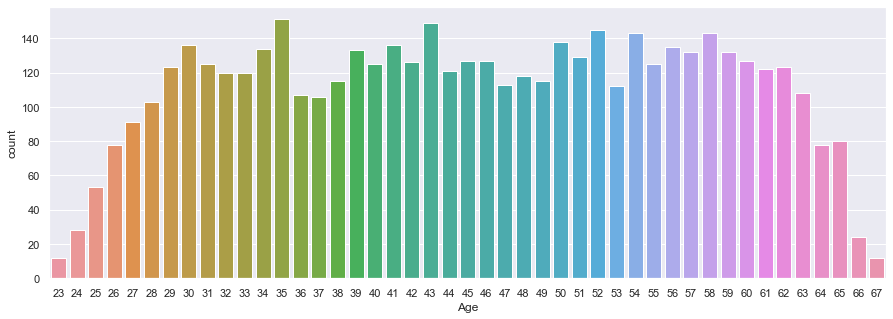

In [171]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Age' , data=pl_df);

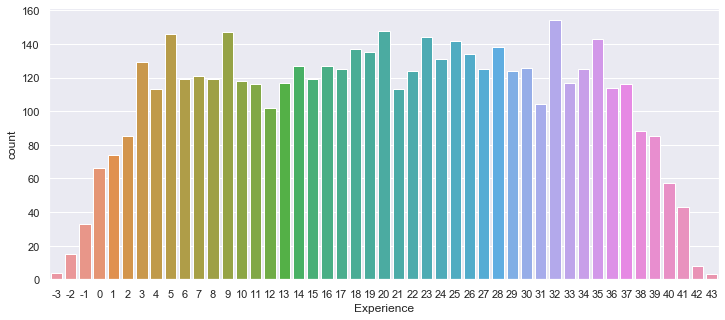

In [175]:
plt.figure(figsize=(12,5))
sns.countplot(x = 'Experience' , data=pl_df);

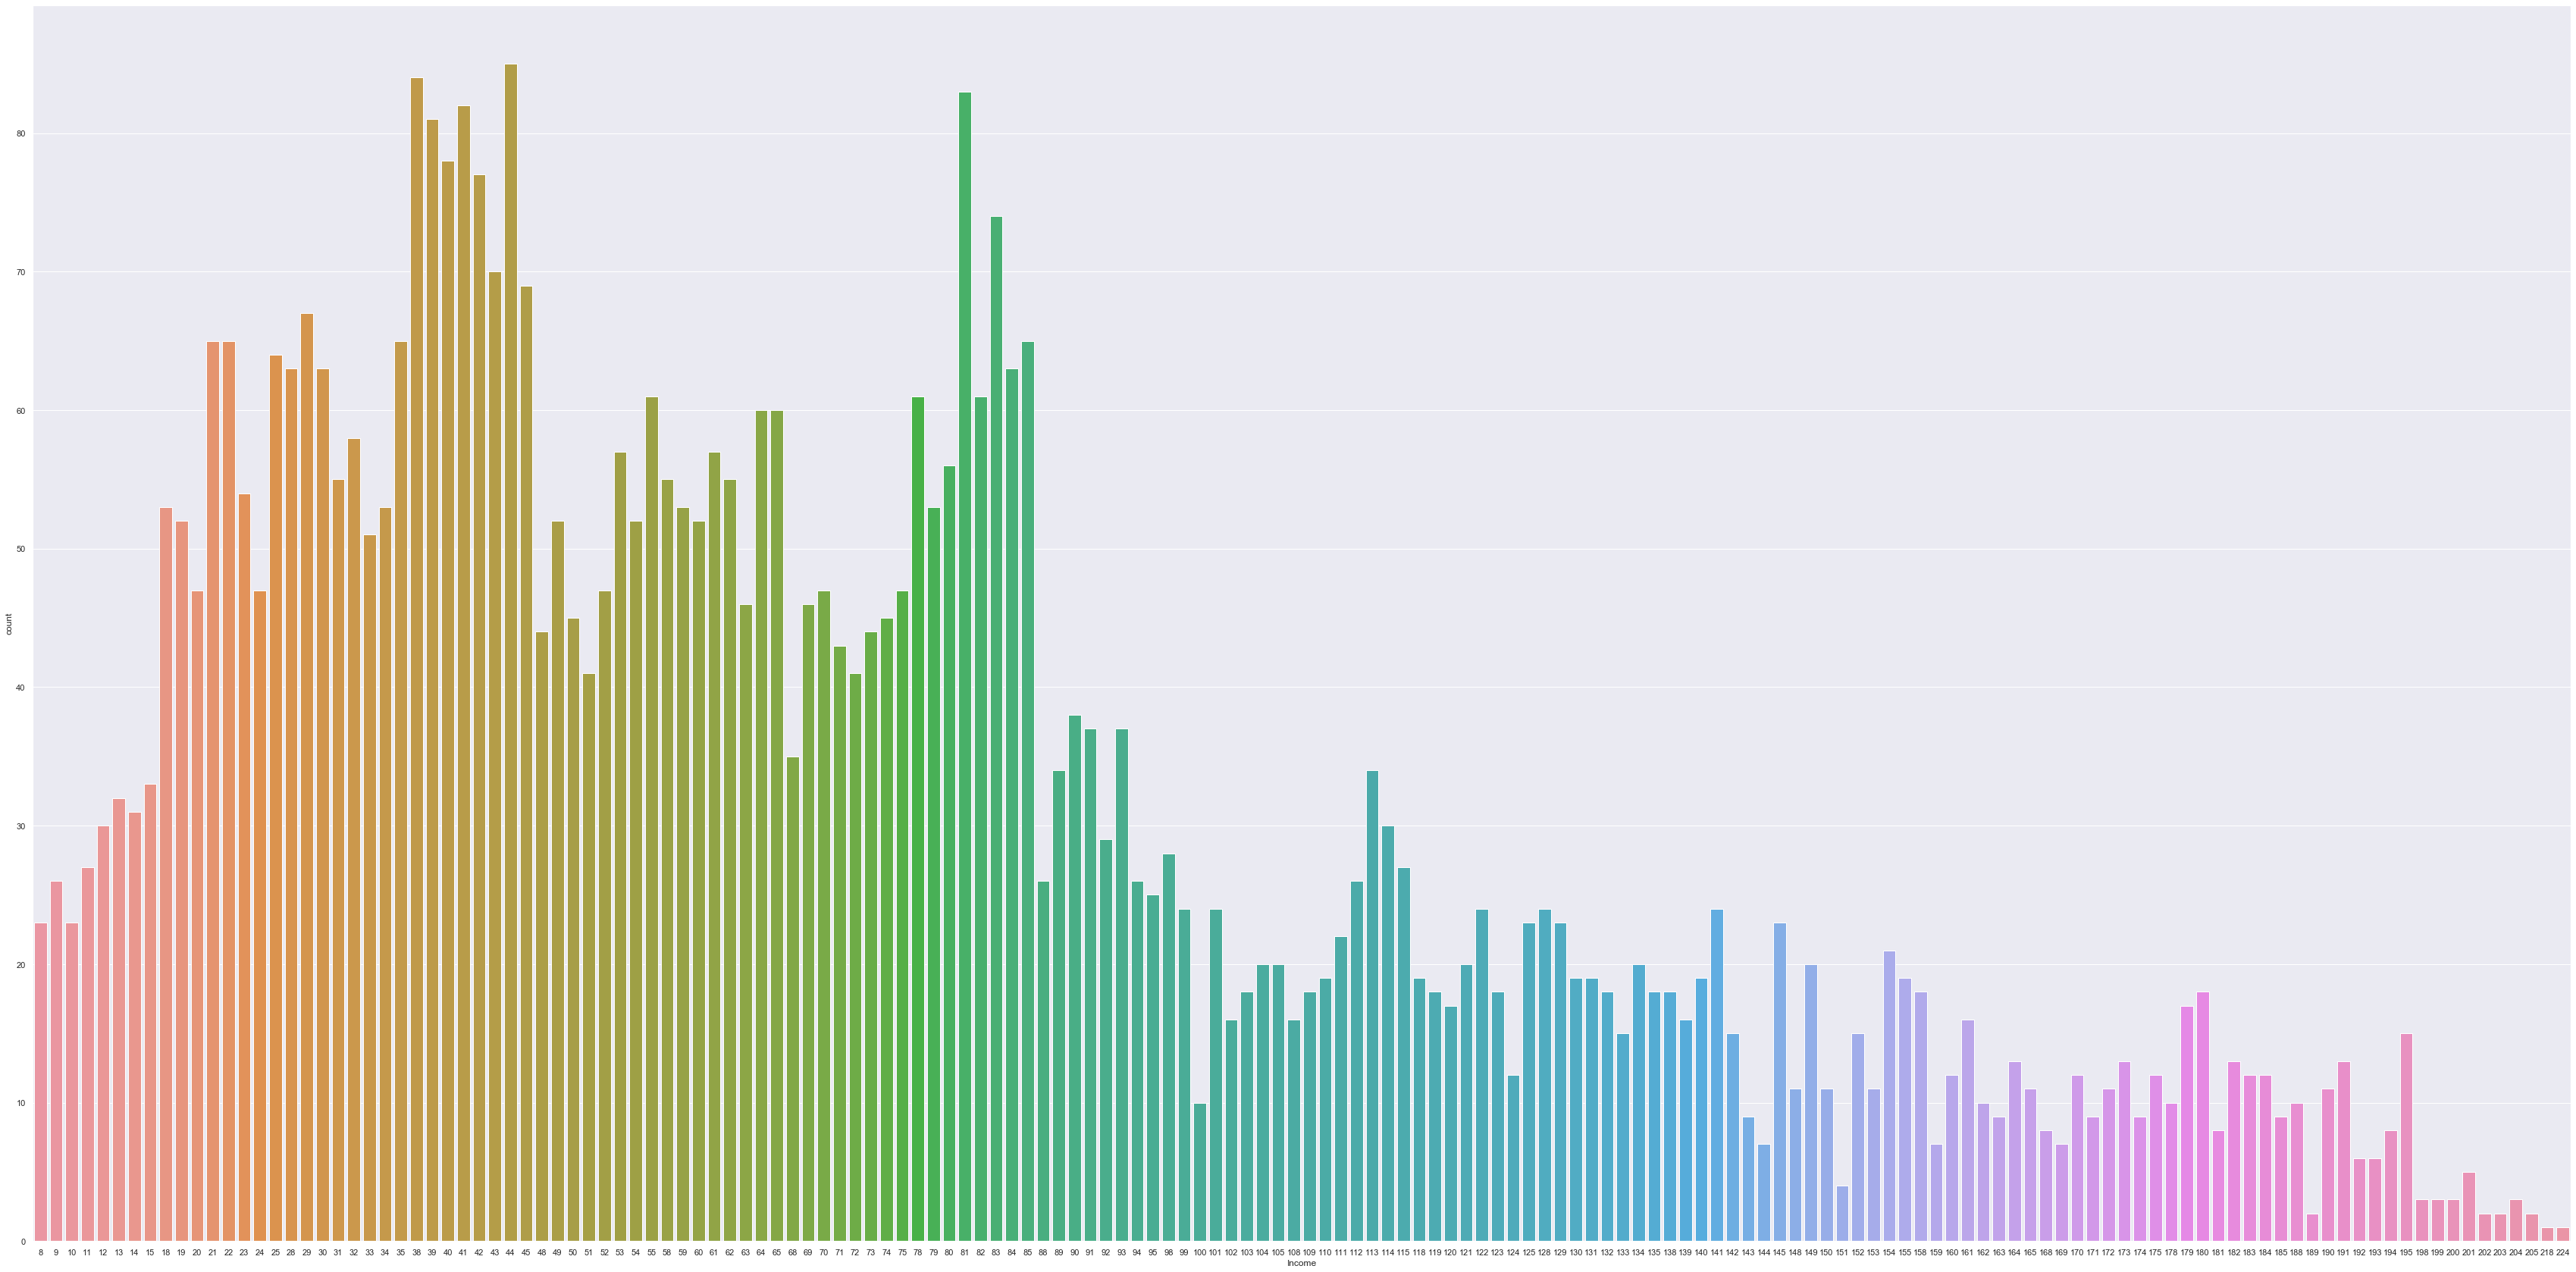

In [193]:
plt.figure(figsize=(60,30))
sns.countplot(x = 'Income' , data=pl_df);

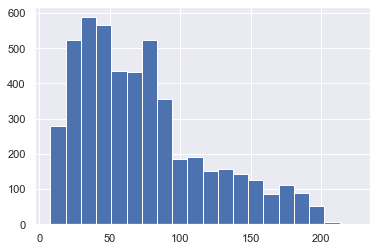

In [191]:
#plt.figure(figsize=(60,24))
#sns.countplot(x = 'Income' , data=pl_df)
plt.hist(pl_df['Income'], bins=20)
plt.show()

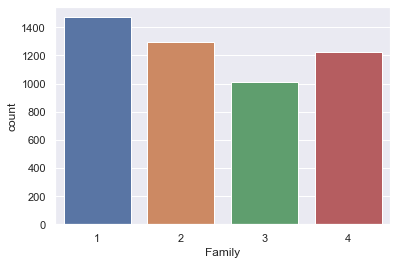

In [165]:
sns.countplot(x = 'Family', data=pl_df);

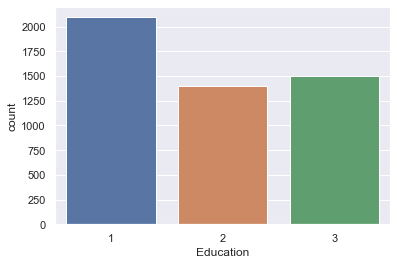

In [160]:
sns.countplot(x = 'Education' , data=pl_df);

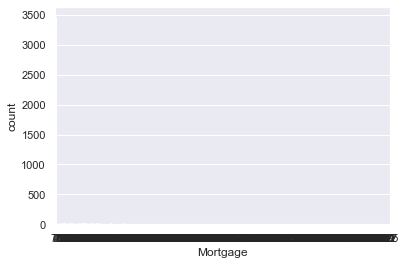

In [186]:
sns.countplot(x = 'Mortgage' , data=pl_df);

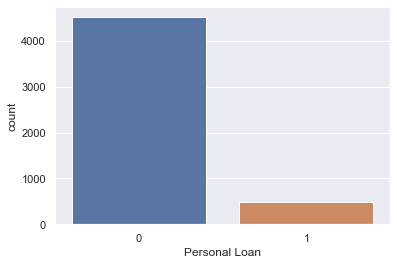

In [167]:
sns.countplot(x = 'Personal Loan' , data=pl_df);

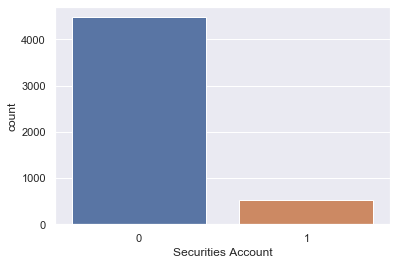

In [168]:
sns.countplot(x = 'Securities Account' , data=pl_df);

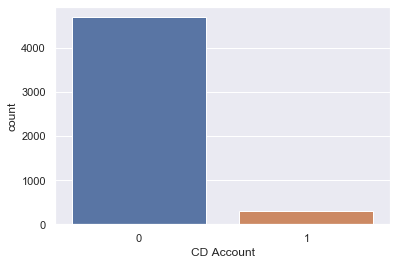

In [176]:
sns.countplot(x = 'CD Account' , data=pl_df);

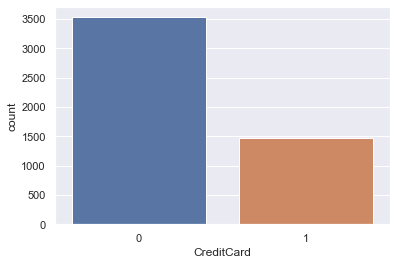

In [182]:
sns.countplot(x = 'CreditCard' , data=pl_df);

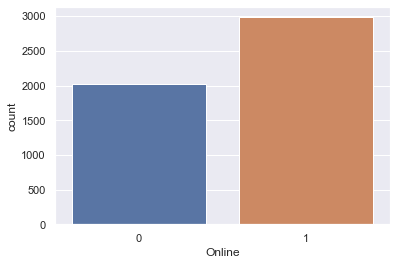

In [183]:
sns.countplot(x = 'Online' , data=pl_df);

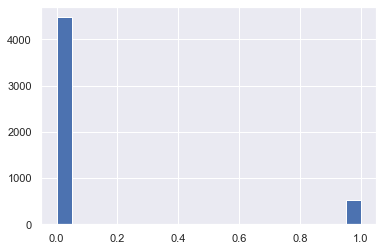

In [196]:
#plt.figure(figsize=(60,24))
#sns.countplot(x = 'Income' , data=pl_df)
plt.hist(pl_df['Securities Account'], bins=20)
plt.show()

# 2.f Get Data Model Ready

In [197]:
pl_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [199]:
df = pl_df.drop('ID', axis =1)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [200]:
df = df.drop('Experience', axis =1)
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [276]:
df = df.drop('ZIP Code', axis =1)
df.head()
df = df.drop('Family', axis =1)
df.head()
df = df.drop('Education', axis =1)
df.head()
df = df.drop('Online', axis =1)
df.head()


KeyError: "['ZIP Code'] not found in axis"

In [206]:
df = df.drop('Age', axis =1)
df.head()

,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,CreditCard
0,49,1.6,0,0,1,0,0
1,34,1.5,0,0,1,0,0
2,11,1.0,0,0,0,0,0
3,100,2.7,0,0,0,0,0
4,45,1.0,0,0,0,0,1


In [207]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
CreditCard,5000.0,0.294000,0.455637,0.0,0.0,0.0,1.0,1.0


In [208]:
df.isnull().sum()

Income                0
CCAvg                 0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
CreditCard            0
dtype: int64

In [209]:
for i in df.columns:
    x = df[i].value_counts()
    print("Column name is:",i,"and it value is:",x)
    print()

Column name is: Income and it value is: 44     85
38     84
81     83
41     82
39     81
       ..
189     2
202     2
205     2
224     1
218     1
Name: Income, Length: 162, dtype: int64

Column name is: CCAvg and it value is: 0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.20      1
9.30      1
3.67      1
5.33      1
Name: CCAvg, Length: 108, dtype: int64

Column name is: Mortgage and it value is: 0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

Column name is: Personal Loan and it value is: 0    4520
1     480
Name: Personal Loan, dtype: int64

Column name is: Securities Account and it value is: 0    4478
1     522
Name: Securities Account, dtype: int64

Column name is: CD Account and it value is: 0    4698
1     302
Name: CD Account, dtype: int64

Column name is: CreditCard and it value is: 0    3530
1    1470
Name: C

In [211]:
display(df.mean())

Income                73.774200
CCAvg                  1.937938
Mortgage              56.498800
Personal Loan          0.096000
Securities Account     0.104400
CD Account             0.060400
CreditCard             0.294000
dtype: float64

In [213]:
display(df.median())

Income                64.0
CCAvg                  1.5
Mortgage               0.0
Personal Loan          0.0
Securities Account     0.0
CD Account             0.0
CreditCard             0.0
dtype: float64

In [214]:
display(df.mode())

,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,CreditCard
0,44,0.3,0,0,0,0,0


In [215]:
display(df.mean())
display(df.median())
display(df.mode())

Income                73.774200
CCAvg                  1.937938
Mortgage              56.498800
Personal Loan          0.096000
Securities Account     0.104400
CD Account             0.060400
CreditCard             0.294000
dtype: float64

Income                64.0
CCAvg                  1.5
Mortgage               0.0
Personal Loan          0.0
Securities Account     0.0
CD Account             0.0
CreditCard             0.0
dtype: float64

,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,CreditCard
0,44,0.3,0,0,0,0,0


In [277]:
df.groupby(["Personal Loan"]).mean()

,Income,CCAvg,Mortgage,Securities Account,CD Account,CreditCard
Personal Loan,,,,,,
0,66.237389,1.729009,51.789381,0.102212,0.035841,0.293584
1,144.745833,3.905354,100.845833,0.125000,0.291667,0.297917


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Income                5000 non-null int64
CCAvg                 5000 non-null float64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


In [218]:
#Convert X & Y variable to a categorical variable as relevant
df['Personal Loan'] = df['Personal Loan'].astype('category')

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Income                5000 non-null int64
CCAvg                 5000 non-null float64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null category
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
CreditCard            5000 non-null int64
dtypes: category(1), float64(1), int64(5)
memory usage: 239.5 KB


In [222]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
y = df['Personal Loan'].value_counts(normalize=True)
print(y)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


In [248]:
## Define X and Y variables

X = df.drop(['Personal Loan'], axis=1)
Y = df[['Personal Loan']]

In [251]:
X.head()

,Income,CCAvg,Mortgage,Securities Account,CD Account,CreditCard
0,49,1.6,0,1,0,0
1,34,1.5,0,1,0,0
2,11,1.0,0,0,0,0
3,100,2.7,0,0,0,0
4,45,1.0,0,0,0,1


In [250]:
y.head()

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

# 3. Split Data into Training data and Test Data

In [252]:
##Split into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

# 4. # Logistic regression Model - identify the performance the data better

In [253]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42);

logreg.fit(X_train, Y_train);

In [254]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [255]:
Y_predict = logreg.predict(X_train) #-----------------Prediction here are 0s and 1s

#--------------to get probability values use this snippet

Y_predict_prob = logreg.predict_proba(X_train)

In [256]:
## function to get confusion matrix in a proper format

def draw_cm( actual, predicted):
    cm = confusion_matrix(actual, predicted)
    print(cm)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [257]:
confusion_matrix(Y_train,Y_predict)

array([[3099,   70],
       [ 189,  142]], dtype=int64)

Trainig accuracy 0.926

Testing accuracy 0.9173333333333333

Confusion Matrix
[[3099   70]
 [ 189  142]]


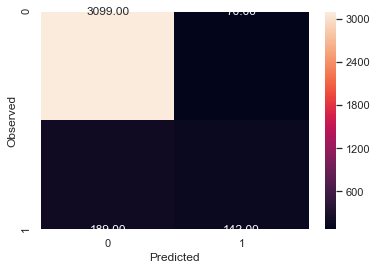

None

Recall: 0.42900302114803623

Precision: 0.6698113207547169

F1 Score: 0.5230202578268877

Log Loss: 2.555885445171995



In [260]:
#-----------------------------------Regression Score--------------------------------------
print("Trainig accuracy",logreg.score(X_train,Y_train))  
print()
print("Testing accuracy",logreg.score(X_test, Y_test))
print()

print('Confusion Matrix')
print(draw_cm(Y_train,Y_predict))
print()

print("Recall:",recall_score(Y_train,Y_predict))
print()

print("Precision:",precision_score(Y_train,Y_predict))
print()

print("F1 Score:",f1_score(Y_train,Y_predict))
print()

print("Log Loss:",log_loss(Y_train,Y_predict))
print()

In [261]:
print("ROC AUC Score:",roc_auc_score(Y_train,Y_predict))

ROC AUC Score: 0.7034570170429357


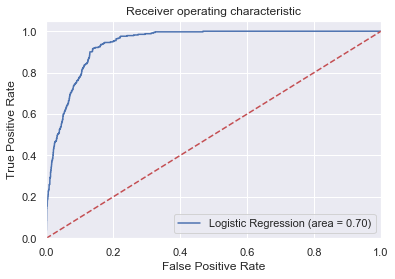

In [265]:
#AUC ROC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


logit_roc_auc = roc_auc_score(Y_train, logreg.predict(X_train))

fpr, tpr, thresholds = roc_curve(Y_train, logreg.predict_proba(X_train)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [267]:
fpr, tpr, thresholds =roc_curve(Y_train, logreg.predict_proba(X_train)[:,1])

# print(thresholds)
FPR=pd.DataFrame(fpr)

FPR.rename(columns = {0:'False Positive Rate'}, inplace = True)




TRP=pd.DataFrame(tpr)

TRP.rename(columns = {0:'True Positive Rate'}, inplace = True)




THRESHOLD=pd.DataFrame(thresholds)

THRESHOLD.rename(columns = {0:'Threshold'}, inplace = True)


result = pd.concat([FPR, TRP, THRESHOLD], axis=1, sort=False)

result.head(10)

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,1.984520
1,0.000000,0.003021,0.984520
2,0.000000,0.006042,0.979204
3,0.000316,0.006042,0.977417
4,0.000316,0.039275,0.931438
5,0.000631,0.039275,0.929459
6,0.000631,0.048338,0.920276
7,0.000947,0.048338,0.915407
8,0.000947,0.087613,0.889645
9,0.001262,0.087613,0.888702


# 5. How model perform better - Check Parameter

In [268]:
# Checking Parameters of logistic regression
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [269]:
# Running a loop to check different values of 'solver'
# solver can only be used with l2, only 'liblinear' works with both 'l1' and 'l2'

# ,'liblinear','sag','saga'

train_score=[]
test_score=[]

solver = ['newton-cg','lbfgs']

for i in solver:
    model = LogisticRegression(random_state=42, penalty='l2', C = 0.75,solver=i)  # changing values of solver
    
    model.fit(X_train, Y_train) 
    y_predict = model.predict(X_test) 
    
    train_score.append(round(model.score(X_train, Y_train),3))
    test_score.append(round(model.score(X_test, Y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs']

[0.926, 0.926]

[0.917, 0.917]


In [270]:
model = LogisticRegression(random_state=42,penalty='l1')  # changing penalty to l1

model.fit(X_train, Y_train)

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,Y_train))  
print()
print("Testing accuracy",model.score(X_test, Y_test))

Trainig accuracy 0.926

Testing accuracy 0.9186666666666666


In [271]:
model = LogisticRegression(random_state=42, penalty='l1',class_weight='balanced') # changing class weight to balanced

model.fit(X_train, Y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,Y_train))  
print()
print("Testing accuracy",model.score(X_test, Y_test))

Trainig accuracy 0.8765714285714286

Testing accuracy 0.8573333333333333


In [273]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]

C = [0.01,0.1,0.25,0.5,0.75,1]

for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, Y_train) 
    Y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,Y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, Y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.848, 0.877, 0.878, 0.877, 0.877, 0.877]

[0.835, 0.859, 0.859, 0.858, 0.858, 0.857]


Trainig accuracy 0.878

Testing accuracy 0.8586666666666667

Confusion Matrix
[[1164  187]
 [  25  124]]


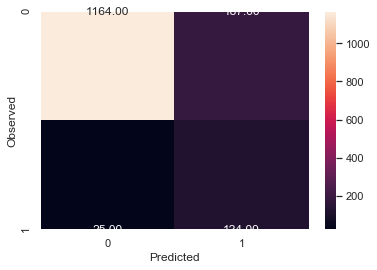

None

Recall: 0.8322147651006712

Precision: 0.3987138263665595

F1 Score: 0.5391304347826087

Roc Auc Score: 0.8468993884718753


In [279]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l1', class_weight='balanced',C=0.25)

model.fit(X_train, Y_train)

Y_predict = model.predict(X_test)

print("Trainig accuracy",model.score(X_train,Y_train))  
print()
print("Testing accuracy",model.score(X_test, Y_test))
print()

print('Confusion Matrix')

print(draw_cm(Y_test,Y_predict))

print()
print("Recall:",recall_score(Y_test,Y_predict))
print()
print("Precision:",precision_score(Y_test,Y_predict))
print()
print("F1 Score:",f1_score(Y_test,Y_predict))
print()
print("Roc Auc Score:",roc_auc_score(Y_test,Y_predict))

# 6. Busniess understanding of the Model

Regularization:
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization

Weight:
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data. 

C-Value:
The underlying C implementation uses a random number generator to select features when fitting the model. It is thus not uncommon, to have slightly different results for the same input data. If that happens, try with a smaller tol parameter. 

This model may help to get better result to find the customer for Personal Loan comapare to previous year. 